In [773]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from category_encoders import LeaveOneOutEncoder


import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression , Lasso , Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR

from sklearn.metrics import r2_score,mean_squared_error

In [774]:
data=pd.read_csv(r'D:\Car Price Prediction Project\car_price_prediction.csv')

## #Explore Data

In [776]:
data.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [777]:
data.shape

(19237, 18)

In [778]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [779]:
data.duplicated().sum()

313

In [780]:
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

In [781]:
data= data[data['Price']>500]
data.shape

(17289, 18)

In [782]:
data.nunique()

ID                  17289
Price                2251
Levy                  545
Manufacturer           64
Model                1567
Prod. year             51
Category               11
Leather interior        2
Fuel type               7
Engine volume         107
Mileage              7257
Cylinders              13
Gear box type           4
Drive wheels            3
Doors                   3
Wheel                   2
Color                  16
Airbags                17
dtype: int64

## #Analsies

In [784]:
top_types=data['Manufacturer'].value_counts().head(10)

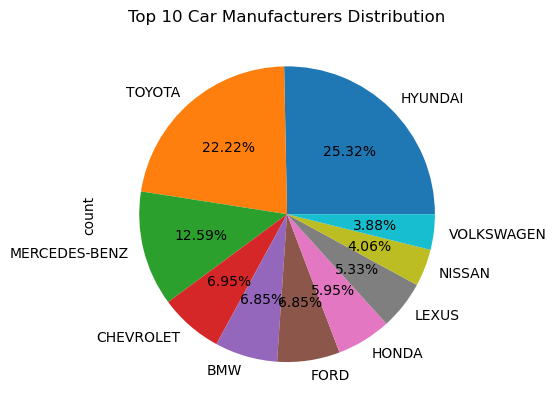

In [785]:
top_types.plot.pie(autopct='%.2f%%')
plt.title('Top 10 Car Manufacturers Distribution')
plt.show()

In [786]:
avg_price_top10 = {i: data[data['Manufacturer'] == i]['Price'].mean() for i in top_types.index}

print(avg_price_top10)

{'HYUNDAI': 23165.696851490666, 'TOYOTA': 16336.433333333332, 'MERCEDES-BENZ': 21236.404481792717, 'CHEVROLET': 15813.705583756346, 'BMW': 21972.84552008239, 'FORD': 17234.291452111225, 'HONDA': 16097.41943127962, 'LEXUS': 24520.656084656086, 'NISSAN': 10985.407986111111, 'VOLKSWAGEN': 11899.441818181818}


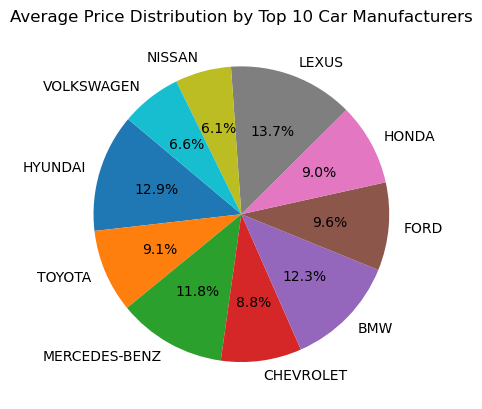

In [787]:
labels = avg_price_top10.keys()   
sizes = avg_price_top10.values()  

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Average Price Distribution by Top 10 Car Manufacturers')
plt.show()

## #Data Preprossing

In [789]:
data.drop(['ID'],axis=1,inplace=True)

data.sample()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
3051,1725,473,CHEVROLET,Cruze,2014,Sedan,Yes,Petrol,1.4,184835 km,4.0,Automatic,Front,04-May,Left wheel,Silver,12


## Date

In [791]:
import datetime
now_date=datetime.datetime.now()
data['Age']=now_date.year-data['Prod. year']
data=data.drop(['Prod. year'],axis=1)

data.sample()

,Price,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Age
8648,8467,-,NISSAN,Serena,Minivan,No,Petrol,2,111111 km,4.0,Variator,Front,04-May,Right-hand drive,White,4,21


## Levy

In [793]:
data['Levy'] = data['Levy'].str.replace('-', '0', regex=False).astype(int)
data.sample()

,Price,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Age
9148,862,2455,LEXUS,GX 470,Jeep,Yes,Petrol,4.7,280354 km,8.0,Automatic,4x4,04-May,Left wheel,White,0,16


## Mileage

In [795]:
data['Mileage'] = data['Mileage'].str.replace('km', '', regex=False).astype(int)
data.sample()

,Price,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Age
5221,3293,645,TOYOTA,Prius,Coupe,Yes,Hybrid,1.8,229461,4.0,Automatic,Front,04-May,Left wheel,Black,12,13


In [796]:
data['Engine volume'].unique()

array(['3.5', '3', '1.3', '2.5', '2', '1.8', '2.4', '4', '1.6', '3.3',
       '2.0 Turbo', '2.2 Turbo', '4.7', '4.4', '3.0 Turbo', '1.4 Turbo',
       '3.6', '1.5', '2.3', '1.5 Turbo', '1.6 Turbo', '2.2', '2.3 Turbo',
       '1.4', '5.5', '2.8 Turbo', '3.2', '3.8', '4.6', '1.2', '5', '1.7',
       '2.9', '0.5', '1.8 Turbo', '2.4 Turbo', '3.5 Turbo', '1.9', '2.7',
       '4.8', '5.3', '2.8', '3.2 Turbo', '1.1', '2.1', '0.7', '5.4',
       '1.3 Turbo', '3.7', '1', '2.5 Turbo', '2.6', '1.9 Turbo',
       '4.4 Turbo', '4.7 Turbo', '0.8', '0.2 Turbo', '5.7', '4.8 Turbo',
       '4.6 Turbo', '6.7', '6.2', '1.2 Turbo', '3.4', '1.7 Turbo',
       '6.3 Turbo', '2.7 Turbo', '0.4', '4.3', '4.2', '2.9 Turbo', '0',
       '4.0 Turbo', '20', '3.6 Turbo', '0.3', '3.7 Turbo', '5.9',
       '5.5 Turbo', '0.2', '2.1 Turbo', '5.6', '6', '0.7 Turbo',
       '0.6 Turbo', '6.8', '4.5', '0.6', '7.3', '0.1', '1.0 Turbo', '6.3',
       '4.5 Turbo', '0.8 Turbo', '4.2 Turbo', '3.1', '5.0 Turbo', '6.4',
       '5

## Engine volume

In [798]:
data['Engine volume'] = data['Engine volume'].str.replace('Turbo', '', regex=False).astype(float)
data.sample()

,Price,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Age
17050,25889,642,SSANGYONG,REXTON,Jeep,Yes,Diesel,2.0,144464,4.0,Automatic,Front,04-May,Left wheel,Silver,4,12


## Delete The Outlire

In [800]:
numeric_columns = data.select_dtypes(exclude=['object']).columns

# Calculate the IQR for each numeric column
Q1 = data[numeric_columns].quantile(0.25)
Q3 = data[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds to filter out outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
data = data[~((data[numeric_columns] < lower_bound) | (data[numeric_columns] > upper_bound)).any(axis=1)]

# Display the cleaned data
data.shape

(11274, 17)

In [801]:
# Select object (categorical) columns
categorical_columns = data.select_dtypes(include='object').columns

# Initialize LeaveOneOutEncoder
loo_encoder = LeaveOneOutEncoder(cols=categorical_columns)

# Apply LeaveOneOutEncoder
# 'Price' is the target column
data[categorical_columns] = loo_encoder.fit_transform(data[categorical_columns], data['Price'])

# Display a sample of the data
data.sample()

,Price,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Age
8064,15053,765,20892.151894,13668.146605,14434.155606,17348.095152,14143.071429,2.0,314523,4.0,16367.621687,16472.575991,16603.827665,17169.780474,15886.679596,4,9


In [802]:
corr=data.corr()
corr

,Price,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Age
Price,1.000000,0.095410,0.402223,0.588967,0.355839,0.110236,0.398957,0.148580,-0.187861,NaN,0.133040,0.053419,0.039432,0.190945,0.100515,-0.111675,-0.343165
Levy,0.095410,1.000000,0.244970,0.257433,0.203797,0.312224,0.220388,0.259169,-0.145759,NaN,0.040650,-0.069649,0.118902,0.209058,0.059339,0.040472,-0.412085
Manufacturer,0.402223,0.244970,1.000000,0.637160,0.283445,0.318496,0.402097,0.150013,-0.016465,NaN,0.072827,0.122723,0.050166,0.222179,0.059817,-0.121841,-0.239565
Model,0.588967,0.257433,0.637160,1.000000,0.536871,0.258481,0.564910,0.263577,-0.068955,NaN,0.023506,0.055850,0.045058,0.182800,0.080987,-0.139678,-0.219414
Category,0.355839,0.203797,0.283445,0.536871,1.000000,0.158962,0.504080,0.333854,-0.015578,NaN,-0.015511,-0.115953,0.037292,0.088857,0.062481,-0.165143,-0.019894
Leather interior,0.110236,0.312224,0.318496,0.258481,0.158962,1.000000,0.170233,0.188290,-0.076424,NaN,0.087691,-0.033798,0.098869,0.341636,0.084060,0.017722,-0.373018
Fuel type,0.398957,0.220388,0.402097,0.564910,0.504080,0.170233,1.000000,0.167300,0.001204,NaN,-0.148484,0.131203,-0.049788,0.166884,0.084943,-0.249035,0.017077
Engine volume,0.148580,0.259169,0.150013,0.263577,0.333854,0.188290,0.167300,1.000000,0.057274,NaN,0.118375,0.041544,0.052449,0.238398,0.077763,0.165003,-0.071341
Mileage,-0.187861,-0.145759,-0.016465,-0.068955,-0.015578,-0.076424,0.001204,0.057274,1.000000,NaN,-0.129411,0.057079,-0.015350,-0.036053,-0.039391,-0.102288,0.315490
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

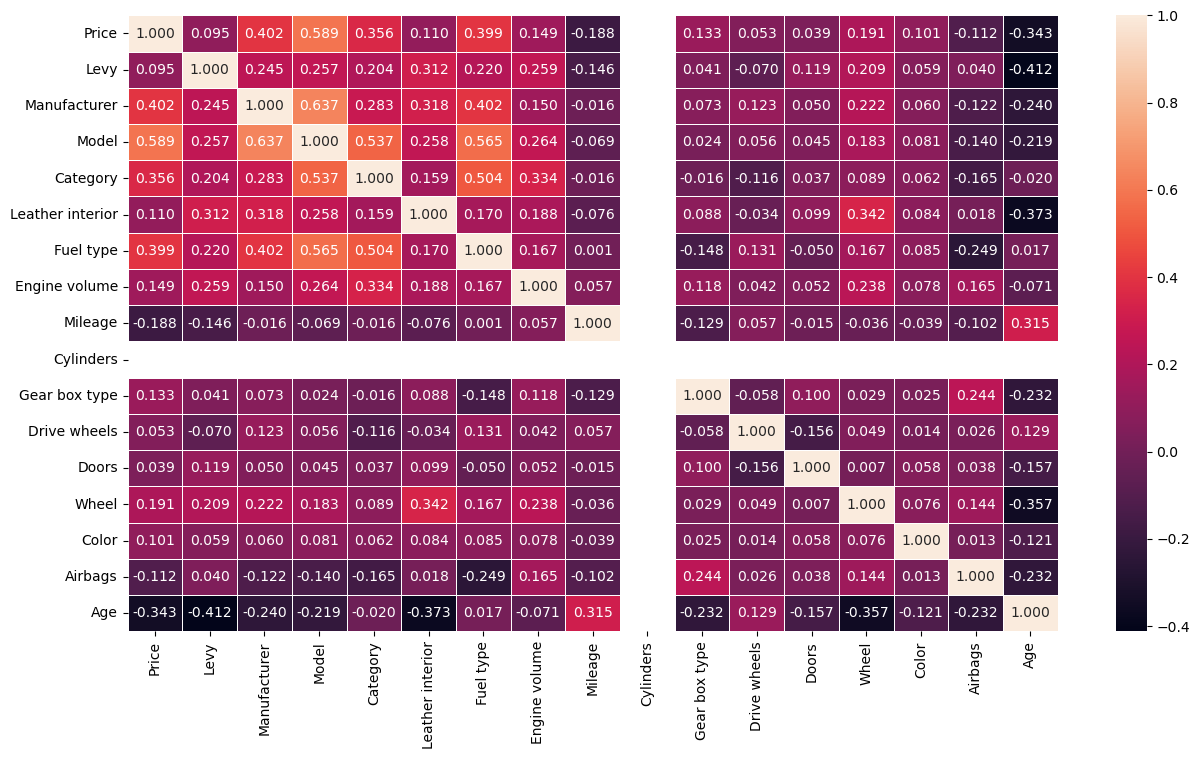

In [803]:
plt.figure(figsize=(15, 8))
sns.heatmap(corr,annot=True,fmt='.3f',linewidth=.5) 

## Feature Selection

In [805]:
data.sample()

,Price,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Age
17574,706,645,13490.923529,11141.273585,12959.857859,17349.944946,12435.378524,1.8,116869,4.0,16369.365791,16474.049291,16605.142818,17171.172845,16581.695949,0,13


In [806]:
x=data.drop(['Price','Color','Doors','Cylinders','Drive wheels'],axis=1)
y=data['Price']

## Normalizing the Data

In [808]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

## Modeling

In [810]:
R2=[]
MSE=[]
Algorithms=['LinearRegression','RandomForestRegressor','GradientBoostingRegressor','DecisionTreeRegressor','KNeighborsRegressor','XGBRegressor']

In [811]:
def models(model):
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    R2_Score=r2_score(y_test,y_pred)
    RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
    R2.append(R2_Score)
    MSE.append(RMSE)
    print(f'The score  = {R2_Score} ')


In [812]:

model1= LinearRegression()
model2= RandomForestRegressor()
model3= GradientBoostingRegressor()
model4= DecisionTreeRegressor()
model5= KNeighborsRegressor()
model6= XGBRegressor()


In [813]:
models(model1)

The score  = 0.4958315924550474 


In [814]:
models(model2)

The score  = 0.9998939720921411 


In [815]:
models(model3)

The score  = 0.9998404119317673 


In [816]:
models(model4)

The score  = 0.9999861204315896 


In [817]:
models(model5)

The score  = 0.4735459587566233 


In [818]:
models(model6)

The score  = 0.992437481880188 


In [819]:
Algorithms_frame=pd.DataFrame({'Algorithms':Algorithms,'R2_Score': R2,'MSE': MSE})


In [820]:
Algorithms_frame

,Algorithms,R2_Score,MSE
0,LinearRegression,0.495832,7787.909094
1,RandomForestRegressor,0.999894,112.938796
2,GradientBoostingRegressor,0.999840,138.558530
3,DecisionTreeRegressor,0.999986,40.862134
4,KNeighborsRegressor,0.473546,7958.171449
5,XGBRegressor,0.992437,953.820589


## Save The Best Model

In [863]:
import pickle
model_file='D:\Car Price Prediction Project\Car Price Prediction.sav'
pickle.dump(model2,open(model_file,'wb'))